# Python Assignment 4

⏱⏱⏱**Due: 11/30/2025 11:59:59 PM** ⏱⏱⏱

Please submit your notebook files and upload them to your Git repository. Don't forget to include a link to your Git repository when submitting this file on Brightspace.

Total points: 150 (equivalent to 15 points after conversion)

I have provided some guidance in comments to help you through the steps, but feel free to approach this in a different way if you prefer. **Feel free to disregard my comments if you have an alternative approach in mind.**

## 1. Good presentation of your code and outputs; submitting your files to Github (10 pts)

Ensure thorough and clear comments within your code to explain its functionality.

Enhance your plots by adding titles, legends, and axis labels where appropriate to provide clarity.

If necessary, employ LaTex notation to present mathematical explanations within the notebook.

Divide your code into multiple blocks or cells in Jupyter Notebook and provide descriptive explanations for each block to improve readability.

As part of your submission, include the notebook files and upload them to your Git repository. Additionally, remember to provide a link to your Git repository when submitting the files on Brightspace.

Please adhere to the constraint of using only the `numpy`, `torch`, `scipy`, and `matplotlib` libraries for this assignment, as it is feasible to complete the task without introducing additional libraries or packages.



## 2. Implementing Gradient Descent Algorithm (60 pts)

Given a function $f(x) = \sqrt{x^2+5}$, $x\in \mathbf{R}$.

Fact: This function is L-smooth.
0. Find the gradient of this function and the minimum value of this function analytically.


1. Plot this function over the interval $[-5, 5]$.
2. Perform the Gradient Descent algorithm to find the minimum value of $f$ for $50$ iterations ($T$) with a step size of $1$ ($\alpha$). Use the last digit of your SB ID divided by 5 and then plus 1 as the initial guess (for example, if your ID ends with 9, your initial guess $x_0$ will be $9\div5 + 1= 2.8$).
3. Record the values of $x_k$ at the $k$-th iteration during GD and report $x_T$.
4. Plot the value of $f(x_k)$ v.s. the iteration number $k$.
5. For each of the step sizes 5, 3, 1, and 0.5, perform gradient descent and record the values of $x_k$ in each step $k$. Plot $f(x_{k-1}) - f(x_{k})$ v.s. $k$ for each step size. Your graphs should all be included in a single plot. Examine if $f(x_{k-1}) - f(x_{k})$ (which means that $f(x_k)$ is always decreasing) is always positive for all $k$.

Here are some sample output graphs. Yours do not have to look exactly like mine, it is just for your reference.
![o1](https://raw.githubusercontent.com/wenhangao21/AMS595-Teaching/main/o1.png)
![o2](https://raw.githubusercontent.com/wenhangao21/AMS595-Teaching/main/o2.png)
![o3](https://raw.githubusercontent.com/wenhangao21/AMS595-Teaching/main/o3.png)

Please note that the graphs generated as output may not precisely match the ones I'm providing here. The disparities could be significant, as I'm presenting a general overview of the expected graph. I've adjusted certain parameters/plot information in the graph generation process to prevent disclosing the "answer/solution".&nbsp;


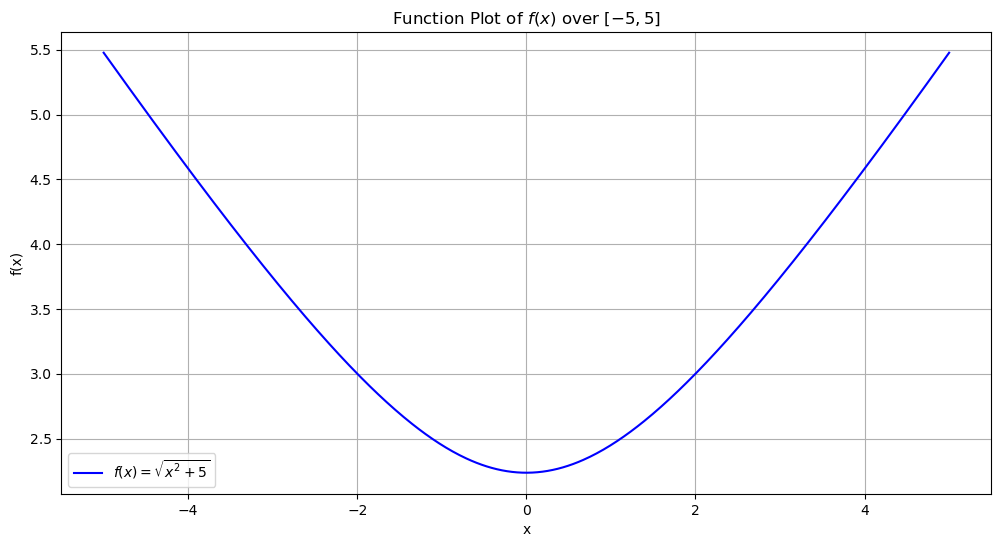

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function f(x).
def f(x): 
    return np.sqrt(x**2 + 5)
# Plot the function f(x), np.linspace might be helpful.

x_vals = np.linspace(-5, 5, 500)
y_vals = f(x_vals)

plt.figure(figsize=(12, 6))
plt.plot(x_vals, y_vals, label=r'$f(x) = \sqrt{x^2 + 5}$', color='blue')
plt.title('Function Plot of $f(x)$ over $[-5, 5]$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid()
plt.show()

x_T after 50 iterations: 3.291399714148593e-13


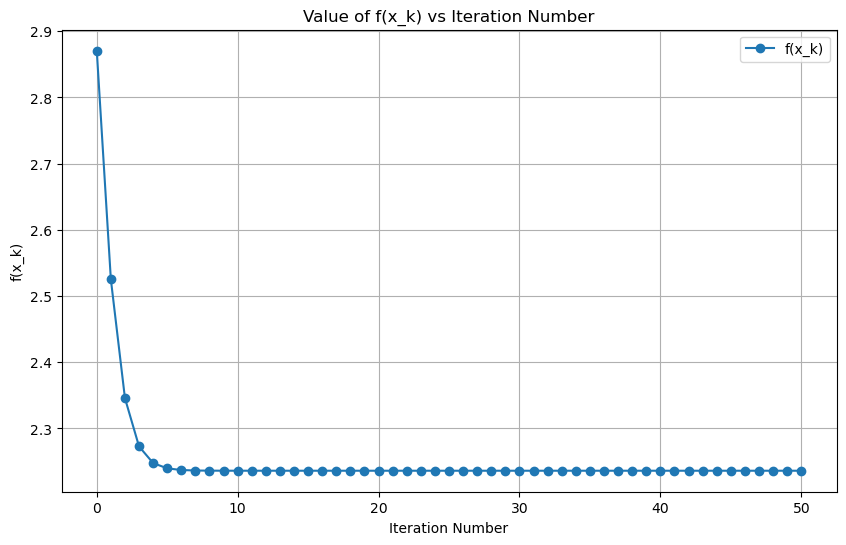

In [6]:
# Define the derivative of the function f(x), for gradient descent
def grad_f(x):
    return x / np.sqrt(x**2 + 5)
    
# write a function to run the Gradient Descent Algorithm, take input arguments x_0, step_size, and num_iterations; return a list/array of x_k values.
def gradient_descent(x_0, step_size, num_iterations):
    x_values = [float(x_0)]  # Ensure x_0 is a float
    for _ in range(num_iterations):
        current_x = x_values[-1]  # Get the most recent x value
        grad = grad_f(current_x)  # Compute gradient at current x
        x_next = current_x - step_size * grad  # Update rule
        x_values.append(float(x_next))  # Append as a float
    return np.array(x_values)  # Return an array of x values
    
# set up/assign initial values
last_digit = 4
x_0 = last_digit / 5 + 1
num_iterations = 50

# Run gradient descent by calling the function
step_size = 1
x_values = gradient_descent(x_0, step_size, num_iterations)
x_T = x_values[-1]
f_values = f(x_values)

# report x_T by printing out the value
print(f"x_T after {num_iterations} iterations: {x_T}")
# Plot the f(x_k) values vs. iteration number
plt.figure(figsize=(10, 6))
plt.plot(range(num_iterations + 1), f_values, marker='o', label='f(x_k)')
plt.title('Value of f(x_k) vs Iteration Number')
plt.xlabel('Iteration Number')
plt.ylabel('f(x_k)')
plt.grid(True)
plt.legend()
plt.show()

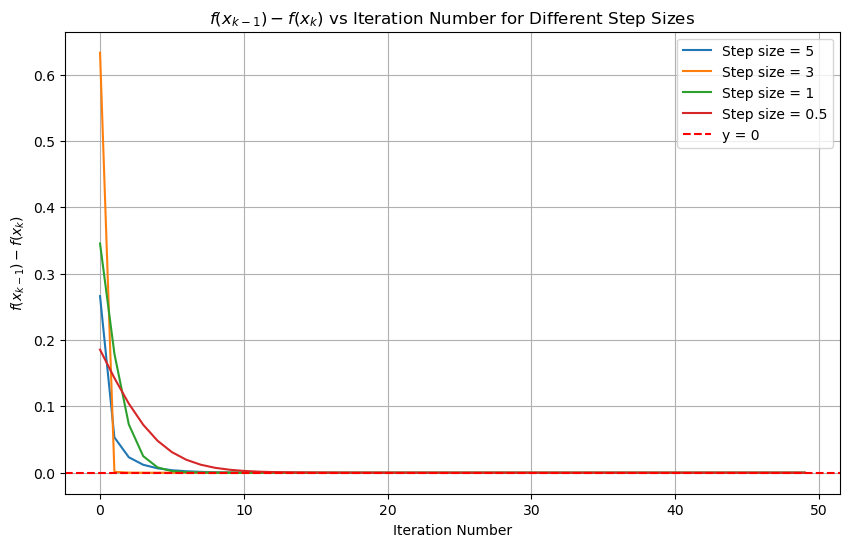

In [8]:
# create a list containing step sizes
step_sizes = [5, 3, 1, 0.5]

# initialize a list to store the results from different step sizes
# loop through the step sizes and perform GD and record results
plt.figure(figsize=(10, 6))
for alpha in step_sizes:
    x_vals = gradient_descent(x_0, alpha, num_iterations)
    f_diffs = f(x_vals[:-1]) - f(x_vals[1:])
    plt.plot(range(num_iterations), f_diffs, label=f'Step size = {alpha}')

# plot multiple curves in a single graph
plt.title(r'$f(x_{k-1}) - f(x_k)$ vs Iteration Number for Different Step Sizes')
plt.xlabel('Iteration Number')
plt.ylabel(r'$f(x_{k-1}) - f(x_k)$')
plt.axhline(0, color='red', linestyle='--', label='y = 0')
plt.grid(True)
plt.legend()
plt.show()

## 3. Linear Regression with Numpy and Graphing with Matplotlib (30 pts)

In class, we implemented a linear regression model with one-dimensional features ( $x$-values). However, below, you will find the code for generating synthetic data where the features ( $x$-values) are now two-dimensional.

**Change the random seed to be the last two digits of your student ID. For example, if your ID is 123456987, change the random seed to be 87.**

The next step involves performing linear regression on this newly generated data. We will employ the normal equation, a topic covered in class, to determine the coefficients and intercept (weights and bias).

**Report the parameter values and plot the generated data and the regression plane (in 1D, we have a line, but in 2D, we have a plane).** `numpy.linspace`, `numpy.meshgrid`, and [Surface Plot](https://matplotlib.org/stable/gallery/mplot3d/surface3d.html) methods might be helpful in plotting the plane. You don't have to use them, it is just my suggestions.

Here are some sample output graphs. Yours do not have to look exactly like mine, it is just for your reference.
![o1](https://raw.githubusercontent.com/wenhangao21/AMS595-Teaching/main/o4.png)



Intercept (bias): 3.766092229400896
Coefficients (weights): [4.18431011 0.62470728]


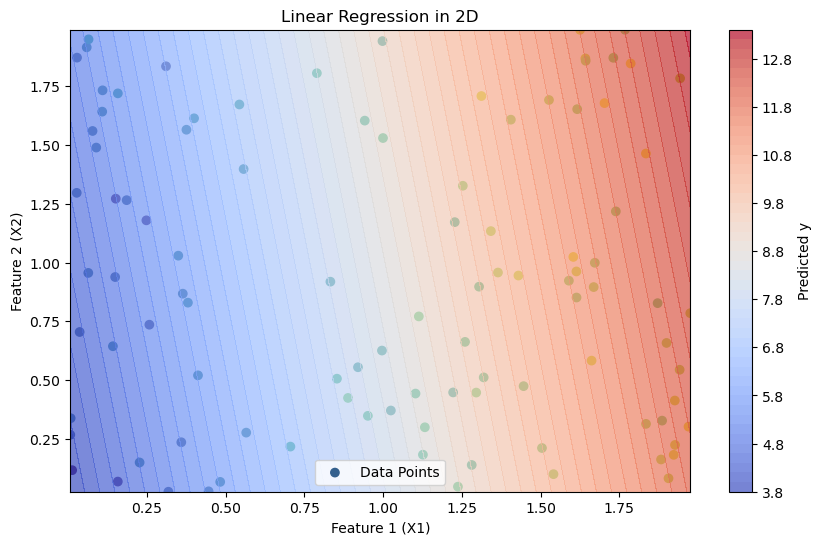

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(34)   # change the seed to be the last two digits of your SB ID.
X = 2 * np.random.rand(100, 2)  # Generate 100 random 2D data points
y = 4 + 4 * X[:, 0] + 0.5 * X[:, 1] + np.random.randn(100)  # Generate y values with noise

# Add a column of ones to X for the bias terms (intercept) in the normal equation
X_bias = np.c_[np.ones((X.shape[0], 1)), X]  # Shape: (100, 3)

# Find theta using the normal equation
theta = np.linalg.inv(X_bias.T @ X_bias) @ (X_bias.T @ y)


# Print the intercept and coefficients of the regression plane
intercept = theta[0]
coefficients = theta[1:]
print(f"Intercept (bias): {intercept}")
print(f"Coefficients (weights): {coefficients}")

# Plot the generated data and the regression plane
x0_range = np.linspace(X[:, 0].min(), X[:, 0].max(), 20)
x1_range = np.linspace(X[:, 1].min(), X[:, 1].max(), 20)
x0_grid, x1_grid = np.meshgrid(x0_range, x1_range)
y_pred = intercept + coefficients[0] * x0_grid + coefficients[1] * x1_grid

# Plot the data points
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="viridis", label="Data Points")

# Plot the regression plane as a heatmap
plt.contourf(x0_grid, x1_grid, y_pred, levels=50, cmap="coolwarm", alpha=0.7)
plt.colorbar(label="Predicted y")

# Labeling
plt.title("Linear Regression in 2D")
plt.xlabel("Feature 1 (X1)")
plt.ylabel("Feature 2 (X2)")
plt.legend()
plt.show()

## 4. Logistic Regression with Numpy and Graphing with Matplotlib (20 pts)

In class, we implemented a logistic regression model to perform binary classification. Here, I provided the exact same code that we discussed in class, but the values for learning_rate and num_epochs are modified. I also removed all the comments. Your task is to
1. Tune the Learning Rate and Number of Epochs: Your first task is to fine-tune the values for the learning_rate and num_epochs parameters. Your goal is to identify suitable values that will enable us to converge to a set of parameter values $\theta$ closely approximating the optimal parameter values $\theta^*$.
2. Code Explanation: To enhance code comprehension, please augment the code with meaningful comments. These comments should elucidate the purpose and functionality of each code segment, making it easier for readers to understand the logistic regression implementation.

By accomplishing these tasks, we aim to achieve a better understanding of the logistic regression model's behavior and its parameter optimization process.

In [12]:
import numpy as np
import matplotlib.pyplot as plt

#define sigmoid function to calculate probabilities
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

#set random seed 
np.random.seed(595)

#generate random input features (2D data with 100 samples)
X = np.random.rand(2, 100)

#true weights and bias used to generate labels
w_true = np.array([1.5, -2.5])
b_true = 1.0  # True bias

#use sigmoid functions to compute true probabilities
probabilities = sigmoid(np.dot(w_true.T, X) + b_true)
Y = (probabilities > 0.5).astype(int)

#add noise to input data 
X = X + 0.3 * np.random.rand(2, 100) - 0.1 * np.random.rand(2, 100)

#80-20 split of the data into training and testing sets
X_train, X_test = X[:,:80], X[:,80:]
Y_train, Y_test = Y[:80], Y[80:]

#initialize weights and bias for regression
w = np.zeros(X.shape[0])
b = 0.0

# changed learning rate and epoch number
learning_rate = .1
num_epochs = 1000


#define training loop for gradient descent
for epoch in range(num_epochs):
    A_train = sigmoid(np.dot(w.T, X_train) + b)

    dJdw = np.dot(X_train, (A_train - Y_train).T) / len(Y_train)
    dJdb = np.mean(A_train - Y_train)

    w -= learning_rate * dJdw
    b -= learning_rate * dJdb

#predictions on training and test sets
A_train = sigmoid(np.dot(w.T, X_train) + b)
predictions_train = (A_train > 0.5).astype(int)

A_test = sigmoid(np.dot(w.T, X_test) + b)
predictions_test = (A_test > 0.5).astype(int)

#compute and print accuracy for sets used for training and testing 
train_accuracy = np.mean(predictions_train == Y_train)
test_accuracy = np.mean(predictions_test == Y_test)

print(f"Training Set Accuracy: {train_accuracy:.2f}")
print(f"Test Set Accuracy: {test_accuracy:.2f}")

Training Set Accuracy: 0.88
Test Set Accuracy: 1.00


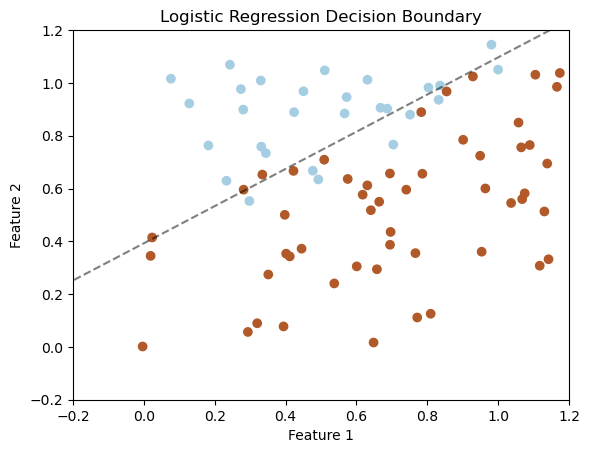

In [14]:
#plot resulting decision boundary and training data
plt.scatter(X[0, :80], X[1,:80], c=Y[:80], cmap=plt.cm.Paired)
plt.xlim(-0.2, 1.2)
plt.ylim(-0.2, 1.2)
ax = plt.gca()

#mesh grid for decision boundary
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
Z = np.dot(w.T, np.c_[xx.ravel(), yy.ravel()].T) + b
Z = sigmoid(Z)
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[0.5], alpha=0.5, linestyles=['--'])

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary')
plt.show()

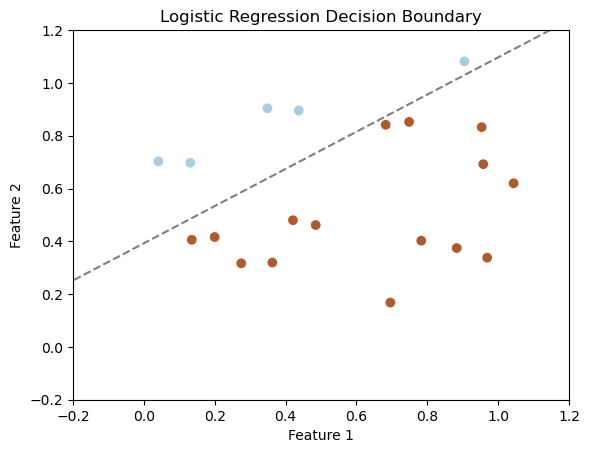

In [16]:
plt.scatter(X[0, 80:], X[1, 80:], c=Y[80:], cmap=plt.cm.Paired)
plt.xlim(-0.2, 1.2)
plt.ylim(-0.2, 1.2)

#repeat of preceding code
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
Z = np.dot(w.T, np.c_[xx.ravel(), yy.ravel()].T) + b
Z = sigmoid(Z)
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[0.5], alpha=0.5, linestyles=['--'])

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary')
plt.show()

## 5. Image Binary Classification (30 pts)



For Question 5 of the Python project, please complete it using two distinct Jupyter Notebook scripts. This entails using one notebook for the original dataset and another for the modified dataset. Consequently, you will be submitting a total of three .ipynb files as part of your Python project, ensuring clear separation and organization of your work.

Your tasks:
1. Your first task is to re-implement the classification model that was covered in our class. Please start from scratch and write the code independently. You can refer to the original code provided on Brightspace if you encounter any difficulties, but try to write the code on your own to reinforce your understanding.

2. After implementing the classification model, **report the indices of all the images in the test set for which the model's predictions are incorrect.** To maintain consistency with Python’s convention, please begin your indexing with 0. Additionally, **display the images of 4 of these failed cases for visual examination (you can display more if you like)**. This analysis might help us identify instances where the model is struggling in some applications.

3. Now you will modify the code to treat the dataset differently. The first 160 images plus the last digit of your Student ID will constitute the new training set, while the remaining images in the original training set will be your new test set. There are 209 images in the original training set. For example, if your ID ends with 0, the first 160 images will form your training set, and the remaining 49 images will be part of your test set. The test dataset is discarded and no longer used. Re-train the model using this modified dataset and **report the training and test accuracies**. Additionally, **provide the indices of all the images in the test set for which the model's predictions are incorrect. Display 4 of these misclassified images for further examination.**

By completing these tasks, you'll gain valuable insights into the classification model's performance and its behavior under different training and testing conditions.


  Datasets: [train]: train_catvnoncat.h5, [test]: test_catvnoncat.h5

Epoch 10/50, Loss: 0.6473
Epoch 20/50, Loss: 0.3694
Epoch 30/50, Loss: 0.2998
Epoch 40/50, Loss: 0.2789
Epoch 50/50, Loss: 0.2476
Test Accuracy: 0.7400
Incorrect Predictions Indices: [ 5  6 10 13 18 19 28 29 30 33 34 44 46]


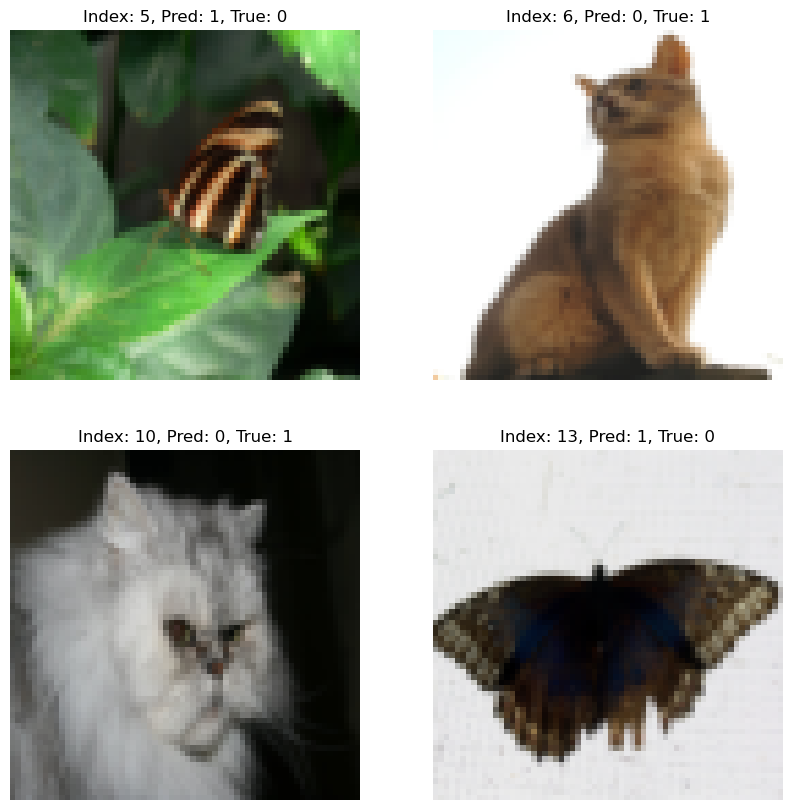

In [18]:
#Reimplementation of the classification model

import h5py
import numpy as np
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

# Load datasets
with h5py.File('train_catvnoncat.h5', 'r') as train_data:
    train_X = np.array(train_data['train_set_x'])
    train_Y = np.array(train_data['train_set_y'])
    
with h5py.File('test_catvnoncat.h5', 'r') as test_data:
    test_X = np.array(test_data['test_set_x'])
    test_Y = np.array(test_data['test_set_y'])

# Normalize the data
train_X = train_X / 255.0
test_X = test_X / 255.0

# Reshape for PyTorch compatibility
train_X = train_X.reshape(train_X.shape[0], -1)  # Flatten
test_X = test_X.reshape(test_X.shape[0], -1)
train_Y = train_Y.reshape(-1, 1)
test_Y = test_Y.reshape(-1, 1)

# Convert to PyTorch tensors
train_X = torch.tensor(train_X, dtype=torch.float32)
train_Y = torch.tensor(train_Y, dtype=torch.float32)
test_X = torch.tensor(test_X, dtype=torch.float32)
test_Y = torch.tensor(test_Y, dtype=torch.float32)

# Create PyTorch DataLoader
train_dataset = TensorDataset(train_X, train_Y)
test_dataset = TensorDataset(test_X, test_Y)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define the model
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)
    
    def forward(self, x):
        return torch.sigmoid(self.linear(x))

model = LogisticRegressionModel(input_dim=train_X.shape[1])

# Define loss function and optimizer
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    for X_batch, Y_batch in train_loader:
        predictions = model(X_batch)
        loss = criterion(predictions, Y_batch)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}")

# Evaluate on test set
model.eval()
with torch.no_grad():
    predictions = (model(test_X) > 0.5).float()
    test_accuracy = (predictions == test_Y).float().mean().item()
    print(f"Test Accuracy: {test_accuracy:.4f}")

#indices of incorrect predictions
incorrect_indices = torch.where(predictions.flatten() != test_Y.flatten())[0].numpy()
print(f"Incorrect Predictions Indices: {incorrect_indices}")

# failed cases
plt.figure(figsize=(10, 10))
for i, idx in enumerate(incorrect_indices[:4]):
    plt.subplot(2, 2, i + 1)
    plt.imshow(test_X[idx].reshape(64, 64, 3).numpy())
    plt.title(f"Index: {idx}, Pred: {int(predictions[idx])}, True: {int(test_Y[idx])}")
    plt.axis('off')
plt.show()

Epoch 10/50, Loss: 0.4027
Epoch 20/50, Loss: 0.6449
Epoch 30/50, Loss: 0.3436
Epoch 40/50, Loss: 0.2841
Epoch 50/50, Loss: 0.2052
Modified Test Accuracy: 0.4889
Incorrect Predictions Indices: [ 0  3  5  6  7  8  9 11 12 15 19 21 24 28 31 32 33 34 36 38 40 41 42]


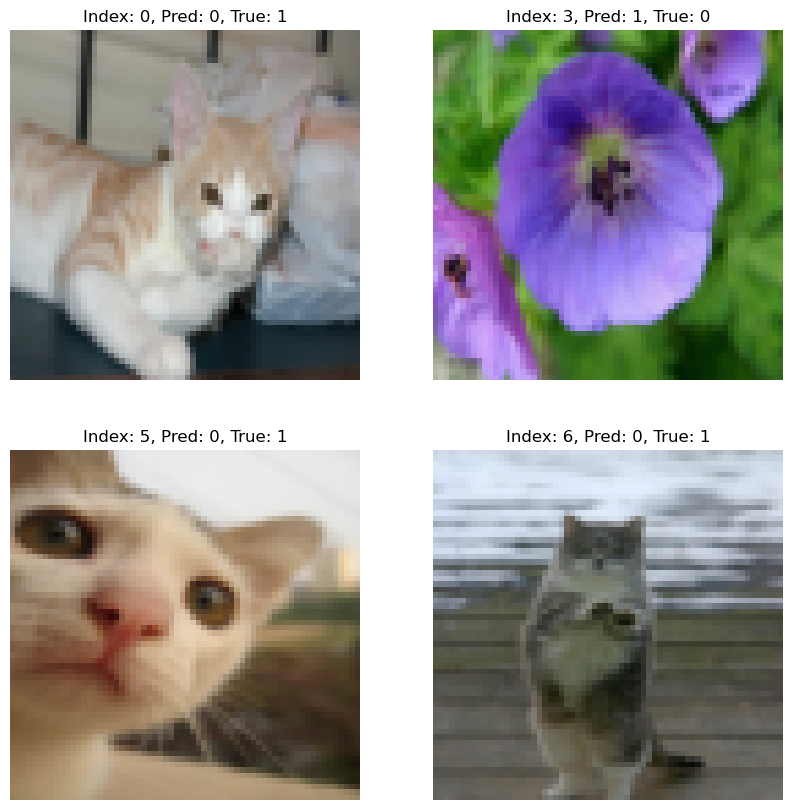

In [20]:
#modified code

# Reconfigure datasets
student_id_last_digit = 4
new_train_size = 160 + student_id_last_digit

# Split the original training set
new_train_X = train_X[:new_train_size]
new_train_Y = train_Y[:new_train_size]
new_test_X = train_X[new_train_size:]
new_test_Y = train_Y[new_train_size:]

# create DataLoaders for new dataset
new_train_dataset = TensorDataset(new_train_X, new_train_Y)
new_test_dataset = TensorDataset(new_test_X, new_test_Y)

new_train_loader = DataLoader(new_train_dataset, batch_size=32, shuffle=True)
new_test_loader = DataLoader(new_test_dataset, batch_size=32, shuffle=False)

# Define new model
model = LogisticRegressionModel(input_dim=new_train_X.shape[1])

# Define loss and optimizer
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training loop
for epoch in range(num_epochs):
    model.train()
    for X_batch, Y_batch in new_train_loader:
        predictions = model(X_batch)
        loss = criterion(predictions, Y_batch)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}")

# Evaluate on the new test set
model.eval()
with torch.no_grad():
    predictions = (model(new_test_X) > 0.5).float()
    new_test_accuracy = (predictions == new_test_Y).float().mean().item()
    print(f"Modified Test Accuracy: {new_test_accuracy:.4f}")

# Find indices of incorrect predictions
incorrect_indices = torch.where(predictions.flatten() != new_test_Y.flatten())[0].numpy()
print(f"Incorrect Predictions Indices: {incorrect_indices}")

# Display failed cases
plt.figure(figsize=(10, 10))
for i, idx in enumerate(incorrect_indices[:4]):
    plt.subplot(2, 2, i + 1)
    plt.imshow(new_test_X[idx].reshape(64, 64, 3).numpy())
    plt.title(f"Index: {idx}, Pred: {int(predictions[idx])}, True: {int(new_test_Y[idx])}")
    plt.axis('off')
plt.show()